ДЗ №2. Линейная регрессия с нуля.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class LinearRegression():

    def __init__(self, learning_rate, iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None

    # X - вектор признаков, Y - вектор значений целевой функции
    def fit(self, X, Y) :
        # Инициализация параметров
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.iterations) :
            # Прямое распространение
            h_X = self.predict(X)
            
            # Вычисление функции потерь
            J = (1/(2*m)) * np.sum((h_X - Y)**2)

            self.update_weights(X, Y, h_X, m)
            
            if i % 100 == 0:
                print(f"Кол-во итераций {i}: Функция потерь = {J:.6f}")
        
        return self

    def update_weights(self, X, Y, h_X, m) :
        dw = (1/m) * np.dot(X.T, (h_X - Y)) # Производные ошибки по параметрам
        db = (1/m) * np.sum(h_X - Y)

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db
        return self.w, self.b

    def predict(self, X) :
        # Предсказание значений
        return np.dot(X, self.w) + self.b

Кол-во итераций 0: Функция потерь = 2820212536.600000
Кол-во итераций 100: Функция потерь = 62052138.823265
Кол-во итераций 200: Функция потерь = 46698866.754594
Кол-во итераций 300: Функция потерь = 36748904.096443
Кол-во итераций 400: Функция потерь = 30300652.775435
Кол-во итераций 500: Функция потерь = 26121748.137555
Кол-во итераций 600: Функция потерь = 23413534.219838
Кол-во итераций 700: Функция потерь = 21658427.736278
Кол-во итераций 800: Функция потерь = 20520999.578008
Кол-во итераций 900: Функция потерь = 19783868.909672


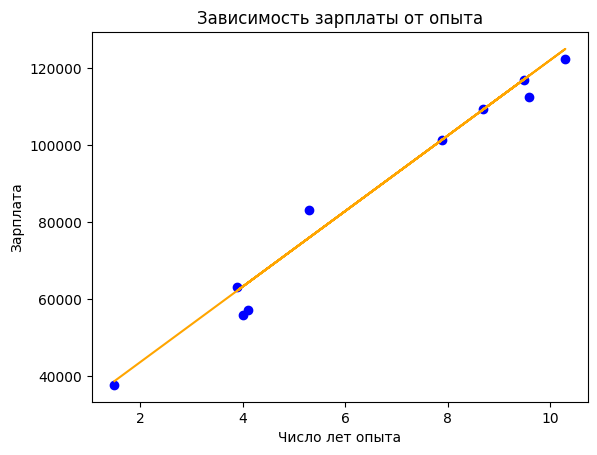

In [4]:
df = pd.read_csv( "Salary_Data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

# Разделеняем на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

# Создание и обучение модели
model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X_train, Y_train)

# Предсказание на тестовых данных
Y_pred = model.predict(X_test)


plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'orange')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')

plt.show()